In [58]:
import pandas as pd 
import sys
import os 
from dotenv import load_dotenv


sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\10ac_week1_telecom_analysis\\src')
from loader import load_data


load_dotenv()

user = os.getenv('PG_USER')
password = os.getenv('PG_PASSWORD')
database_name = 'telecom'
table_name= 'xdr_data'
host = 'localhost'
port = '5432'

#Load data from Loader Module
df = load_data(host, port, user, password, database_name, table_name)
print(df[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].tail(600))


        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
149401                          NaN                          NaN
149402                          NaN                          NaN
149403                          NaN                          NaN
149404                      61114.0                          NaN
149405                          NaN                          NaN
...                             ...                          ...
149996                          NaN                          NaN
149997                          NaN                          NaN
149998                          NaN                          NaN
149999                          NaN                          NaN
150000                          NaN                          NaN

[600 rows x 2 columns]


In [59]:
cluster_summary_cleaned = pd.read_csv('cluster_summary_cleaned.csv')
df_cleaned=pd.read_csv('analyezed_df.csv')
print(df_cleaned.info())

cluster_summary_cleaned.reset_index(inplace=True)
cluster_summary_cleaned.rename(columns={'index': 'Cluster'}, inplace=True)
print(cluster_summary_cleaned)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 59 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [60]:
import numpy as np

# Assuming `cluster_summary_cleaned` contains the cluster centroids from the first clustering
# And `df_cleaned` contains the user data with assigned cluster labels

# Calculate Euclidean distance between each user and cluster centroids
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Find the centroid of the less engaged cluster
less_engaged_cluster_centroid = cluster_summary_cleaned.loc[cluster_summary_cleaned['Average tp'].idxmin()]
print(less_engaged_cluster_centroid)
# Calculate engagement score for each user
engagement_scores = []
for index, row in df_cleaned.iterrows():
    user_data = np.array([row['Average tp'], row['Average TCP Retrans']])
    distance_to_less_engaged_cluster = euclidean_distance(user_data, less_engaged_cluster_centroid[['Average tp', 'Average TCP Retrans']])
    engagement_scores.append(distance_to_less_engaged_cluster)

# Add engagement scores to the dataframe
df_cleaned['Engagement Score'] = engagement_scores

# Print the dataframe with engagement scores



Cluster                0.000000e+00
Average tp             1.868912e+03
Average TCP Retrans    8.203036e+10
Name: 0, dtype: float64


In [61]:
least_engagement=df_cleaned[['MSISDN/Number', 'Cluster', 'Engagement Score']].sort_values(by="Engagement Score", ascending=False).tail(10)
print(least_engagement)

        MSISDN/Number  Cluster  Engagement Score
15361    3.369954e+10        0               0.0
15360    3.364245e+10        0               0.0
15354    3.366039e+10        0               0.0
15351    3.365819e+10        0               0.0
138516   3.366691e+10        0               0.0
94552    3.365986e+10        0               0.0
94530    3.362113e+10        0               0.0
138530   3.365019e+10        0               0.0
15317    3.366836e+10        0               0.0
75000    3.365851e+10        0               0.0


In [62]:


# Calculate Euclidean distance between each user and cluster centroids
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Find the centroid of the cluster with the worst experience
worst_experience_cluster_centroid = cluster_summary_cleaned.loc[
    (cluster_summary_cleaned['Average tp'].idxmax()) &
    (cluster_summary_cleaned['Average TCP Retrans'].idxmax())
]

# Calculate experience score for each user
experience_scores = []
for index, row in df_cleaned.iterrows():
    user_data = np.array([row['Average tp'], row['Average TCP Retrans']])
    distance_to_worst_experience_cluster = euclidean_distance(
        user_data, 
        worst_experience_cluster_centroid[['Average tp', 'Average TCP Retrans']]
    )
    experience_scores.append(distance_to_worst_experience_cluster)

# Add experience scores to the dataframe
df_cleaned['Experience Score'] = experience_scores

# Print the dataframe with experience scores
top_worst=df_cleaned[['MSISDN/Number', 'Cluster', 'Experience Score']].sort_values(by="Experience Score", ascending=False).tail(10)
print(top_worst)


        MSISDN/Number  Cluster  Experience Score
15361    3.369954e+10        0               0.0
15360    3.364245e+10        0               0.0
15354    3.366039e+10        0               0.0
15351    3.365819e+10        0               0.0
138516   3.366691e+10        0               0.0
94552    3.365986e+10        0               0.0
94530    3.362113e+10        0               0.0
138530   3.365019e+10        0               0.0
15317    3.366836e+10        0               0.0
75000    3.365851e+10        0               0.0


In [63]:
#top statsfied users
df_cleaned["Satisfaction Score"]=np.mean(df_cleaned[["Engagement Score","Experience Score"]],axis=1  )
satisfied=df_cleaned.sort_values(by="Satisfaction Score", ascending=False).groupby("MSISDN/Number")
top_satisfied=satisfied.head(10)
print(top_satisfied[["MSISDN/Number","Satisfaction Score"]].head(10))


        MSISDN/Number  Satisfaction Score
121439   3.365884e+10        3.546240e+08
61581    3.369944e+10        3.523718e+08
79919    3.366911e+10        3.510566e+08
37815    3.369988e+10        3.485615e+08
786      3.366537e+10        3.483633e+08
61170    3.366216e+10        3.463681e+08
61552    3.376180e+10        3.461636e+08
3875     3.376050e+10        3.458172e+08
76281    3.364886e+10        3.445415e+08
59083    3.376376e+10        3.423356e+08


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from utils import DataProcessor
from sklearn.compose import ColumnTransformer

# Assuming df_cleaned is your cleaned dataframe


features=['Average RTT', 'Average tp','Engagement Score','Experience Score','Average TCP Retrans']
X = df_cleaned[features]
y = df_cleaned['Satisfaction Score']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features),  # Impute missing values with mean for numerical columns
        ('scaler', StandardScaler(), features)  # Scale numerical features
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data processing step
    ('model', RandomForestRegressor(random_state=42))  # Model training step
])

pipeline.fit(train_X, train_y)

val_predictions = pipeline.predict(val_X)

# Evaluate the model
mse = mean_squared_error(val_y, val_predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 810113690.6136128


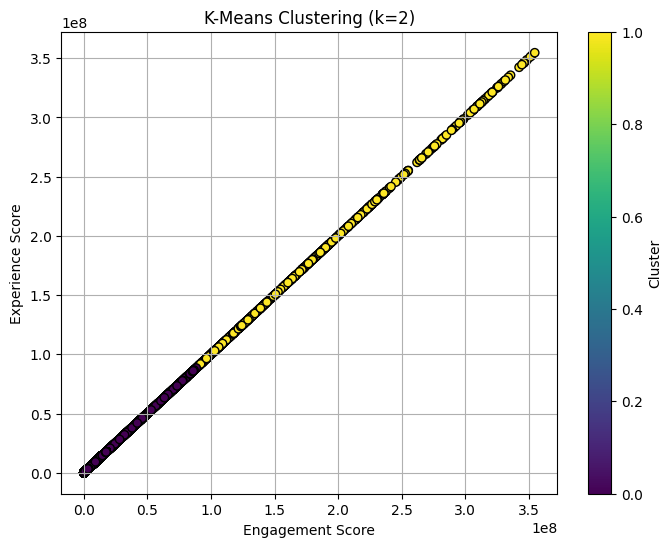

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features for clustering
features = ['Engagement Score', 'Experience Score']
X = df_cleaned[features]

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df_cleaned['Clusterk2'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Engagement Score'], X['Experience Score'], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


he data points are well-separated along a linear boundary, which could mean that K-means is effectively partitioning the data into two clusters based on this linear relationship.

In [66]:
# Group the dataframe by the 'Cluster' column and calculate the mean of 'Satisfaction Score' and 'Experience Score' for each cluster
cluster_means = df_cleaned.groupby('Cluster')[['Satisfaction Score', 'Experience Score']].mean()

# Print the aggregated results
print(cluster_means)

         Satisfaction Score  Experience Score
Cluster                                      
0              5.525525e+06      5.525525e+06
1              1.508524e+07      1.508524e+07
2              1.530330e+08      1.530330e+08


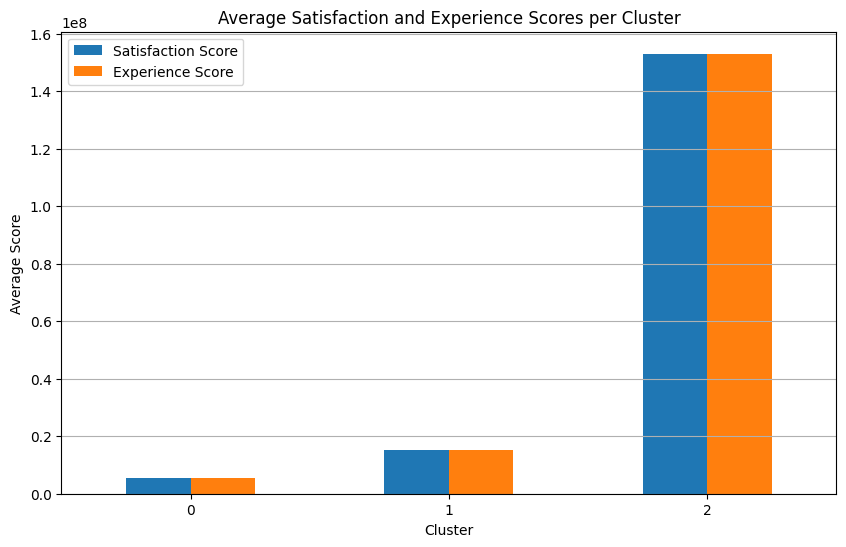

In [67]:

# Group the dataframe by the 'Cluster' column and calculate the mean of 'Satisfaction Score' and 'Experience Score' for each cluster
cluster_means = df_cleaned.groupby('Cluster')[['Satisfaction Score', 'Experience Score']].mean()

# Plot the bar chart
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Satisfaction and Experience Scores per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Satisfaction Score', 'Experience Score'])
plt.grid(axis='y')
plt.show()



In [68]:
from sqlalchemy import create_engine
connection_params = {
        "host": host,
        "user": user,
        "password": password,
        "port": port,
        "database": database_name
    }

engine = create_engine(
        f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}"
    )
# Export the final DataFrame containing user ID, engagement score, experience score, and satisfaction score to the MySQL database
df_cleaned.to_sql('final_table', con=engine, if_exists='replace', index=False)

# Close the SQLAlchemy engine
engine.dispose()